In [1]:
#https://www.kaggle.com/tunguz/big-five-personality-test

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from random import sample
import seaborn as sns
sns.set_theme()
#plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(15,10)
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('data-final-clean.csv')


# Exploratory Data Analysis

In [7]:
data.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB


In [8]:
# draw 10,000 samples

data_sample = data.sample(10000)
data_sample_analysis = data.sample(10000, random_state=1)

In [9]:
data_sample.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
486942,1.0,2.0,1.0,4.0,3.0,3.0,1.0,5.0,1.0,5.0,...,2.0,4.0,2.0,4.0,2.0,3.0,3.0,4.0,4.0,US
711919,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,...,2.0,3.0,1.0,3.0,1.0,4.0,4.0,5.0,5.0,US
202347,3.0,3.0,5.0,1.0,4.0,3.0,4.0,3.0,2.0,2.0,...,3.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,CA
44551,3.0,2.0,4.0,3.0,5.0,1.0,5.0,3.0,4.0,1.0,...,2.0,5.0,1.0,5.0,1.0,3.0,2.0,1.0,5.0,US
826365,2.0,1.0,5.0,2.0,5.0,1.0,4.0,1.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,4.0,5.0,5.0,US


In [27]:
# compute the sum of every personality trait and assign to new dataframe

data_sample['extraversion']=data_sample.loc[:,'EXT1':'EXT10'].mode(axis=1).max(axis=1)
data_sample['emotional_stability']=data_sample.loc[:,'EST1':'EST10'].mode(axis=1).max(axis=1)
data_sample['aggreableness']=data_sample.loc[:,'AGR1':'AGR10'].mode(axis=1).max(axis=1)
data_sample['conscientiousness']=data_sample.loc[:,'CSN1':'CSN10'].mode(axis=1).max(axis=1)
data_sample['openness']=data_sample.loc[:,'OPN1':'OPN10'].mode(axis=1).max(axis=1)

data_mode = data_sample.loc[:,'country':'openness']

In [28]:
data_mode.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness
486942,US,1.0,5.0,5.0,4.0,4.0
711919,US,5.0,5.0,4.0,4.0,4.0
202347,CA,3.0,2.0,5.0,2.0,4.0
44551,US,3.0,4.0,5.0,3.0,5.0
826365,US,4.0,5.0,5.0,5.0,5.0


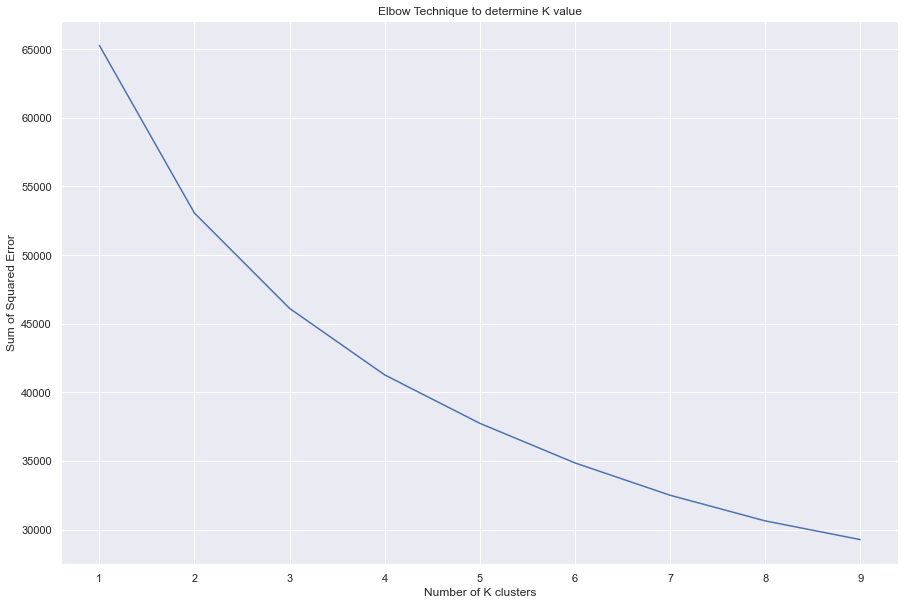

In [29]:
# compute optimum number of clusters for KMeans using Elbow Technique

x = data_mode.loc[:,'extraversion':'openness']
k = range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    sse.append(km.inertia_)
    
plt.plot(k, sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [33]:
x = data_mode.loc[:,'extraversion':'openness']
data_mode['clusters'] = KMeans(n_clusters=4, random_state=42).fit_predict(x)
data_mode.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness,clusters
486942,US,1.0,5.0,5.0,4.0,4.0,0
711919,US,5.0,5.0,4.0,4.0,4.0,3
202347,CA,3.0,2.0,5.0,2.0,4.0,2
44551,US,3.0,4.0,5.0,3.0,5.0,0
826365,US,4.0,5.0,5.0,5.0,5.0,3


([<matplotlib.patches.Wedge at 0x1e78665e0d0>,
 [Text(0.7072722290848037, 0.8424761088395405, ''),
  Text(-0.9469920948951933, 0.5596480788906664, ''),
  Text(-0.4836228012109188, -0.9879822802808279, ''),
  Text(0.8953708979108022, -0.6389921401507253, '')])

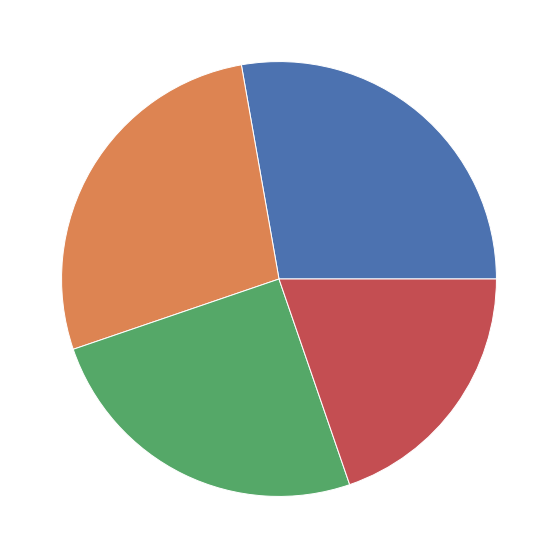

In [34]:
plt.pie(data_mode['clusters'].value_counts())

In [35]:
data_mode['clusters'].value_counts()

3    2777
0    2747
2    2503
1    1973
Name: clusters, dtype: int64

<AxesSubplot:xlabel='extraversion', ylabel='Density'>

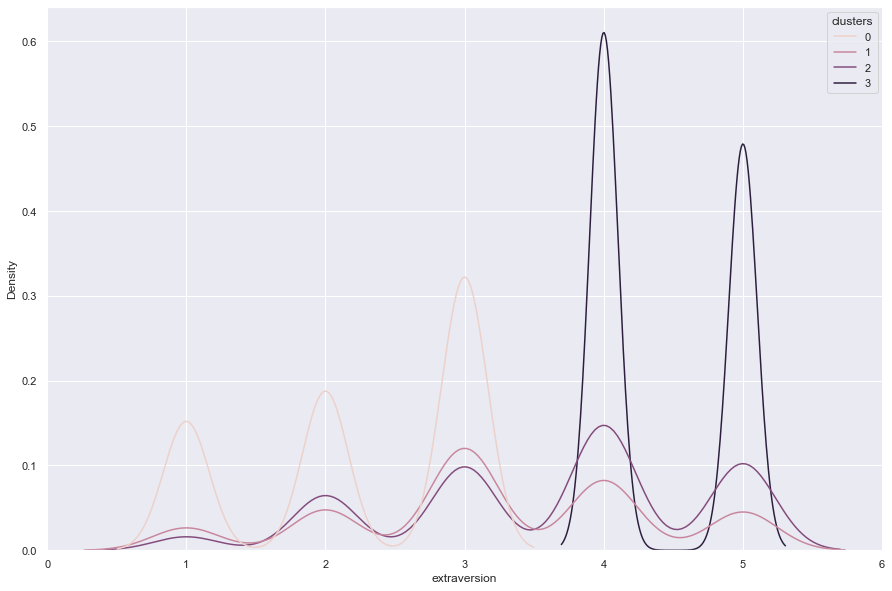

In [37]:
sns.kdeplot(data=data_mode, x= 'extraversion', hue='clusters')

<AxesSubplot:xlabel='emotional_stability', ylabel='Density'>

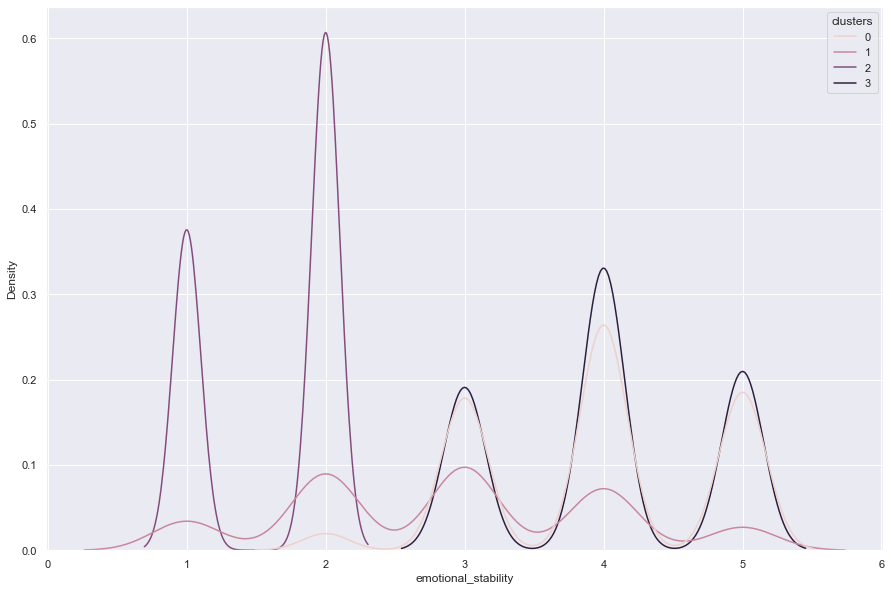

In [38]:
sns.kdeplot(data=data_mode, x= 'emotional_stability', hue='clusters')

<AxesSubplot:xlabel='extraversion', ylabel='emotional_stability'>

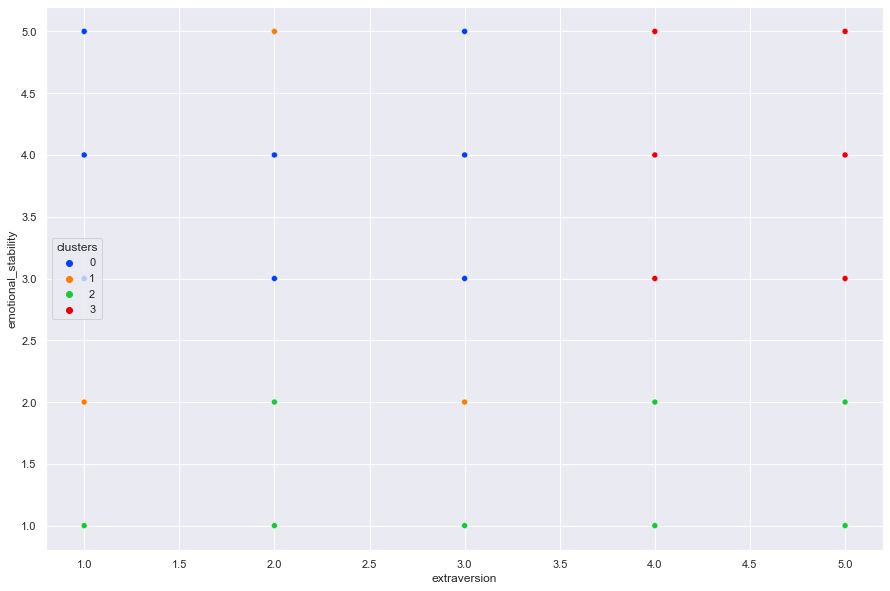

In [40]:
sns.scatterplot(data=data_mode, x='extraversion', y='emotional_stability', hue='clusters', palette='bright')

<AxesSubplot:xlabel='aggreableness', ylabel='conscientiousness'>

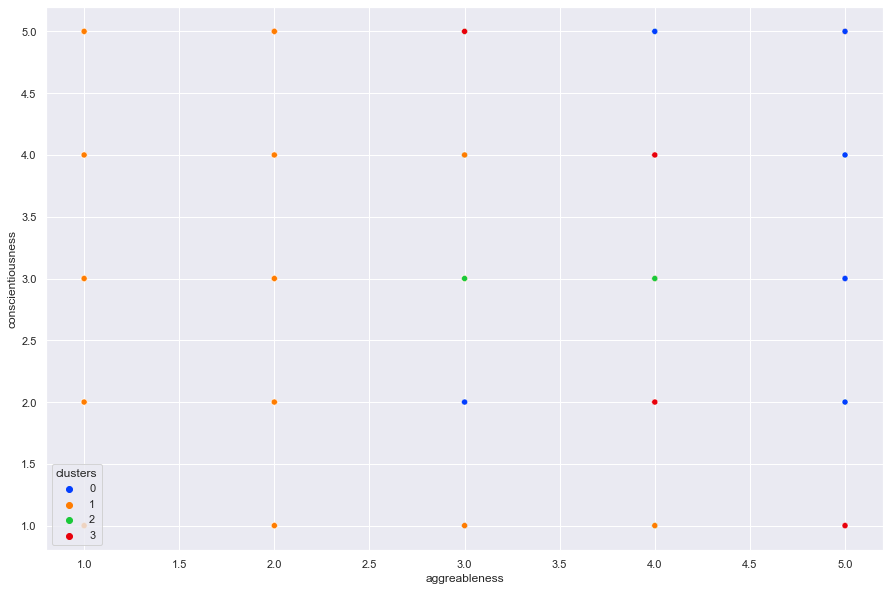

In [41]:
sns.scatterplot(data=data_mode, x='aggreableness', y='conscientiousness', hue='clusters', palette='bright')

In [44]:
cluster_0_extraversion = data_mode.loc[data_mode['clusters']==0, 'extraversion']
cluster_1_extraversion = data_mode.loc[data_mode['clusters']==1, 'extraversion']
cluster_2_extraversion = data_mode.loc[data_mode['clusters']==2, 'extraversion']
cluster_3_extraversion = data_mode.loc[data_mode['clusters']==3, 'extraversion']

In [49]:
from scipy.stats import f_oneway

f_oneway(cluster_0_extraversion, cluster_1_extraversion, cluster_2_extraversion,cluster_3_extraversion)

F_onewayResult(statistic=2798.359732174765, pvalue=0.0)

In [7]:
# compute the sum of every personality trait and assign to new dataframe

data_sample['extraversion']=data_sample.loc[:,'EXT1':'EXT10'].sum(axis=1)
data_sample['emotional_stability']=data_sample.loc[:,'EST1':'EST10'].sum(axis=1)
data_sample['aggreableness']=data_sample.loc[:,'AGR1':'AGR10'].sum(axis=1)
data_sample['conscientiousness']=data_sample.loc[:,'CSN1':'CSN10'].sum(axis=1)
data_sample['openness']=data_sample.loc[:,'OPN1':'OPN10'].sum(axis=1)

data_sum = data_sample.loc[:,'country':'openness']

In [8]:
data_sum.head()

,country,extraversion,emotional_stability,aggreableness,conscientiousness,openness
4403,US,34.0,21.0,29.0,38.0,28.0
369486,BE,34.0,33.0,35.0,37.0,33.0
257750,US,30.0,20.0,34.0,25.0,34.0
433412,US,29.0,20.0,30.0,23.0,28.0
591556,US,32.0,28.0,34.0,30.0,31.0


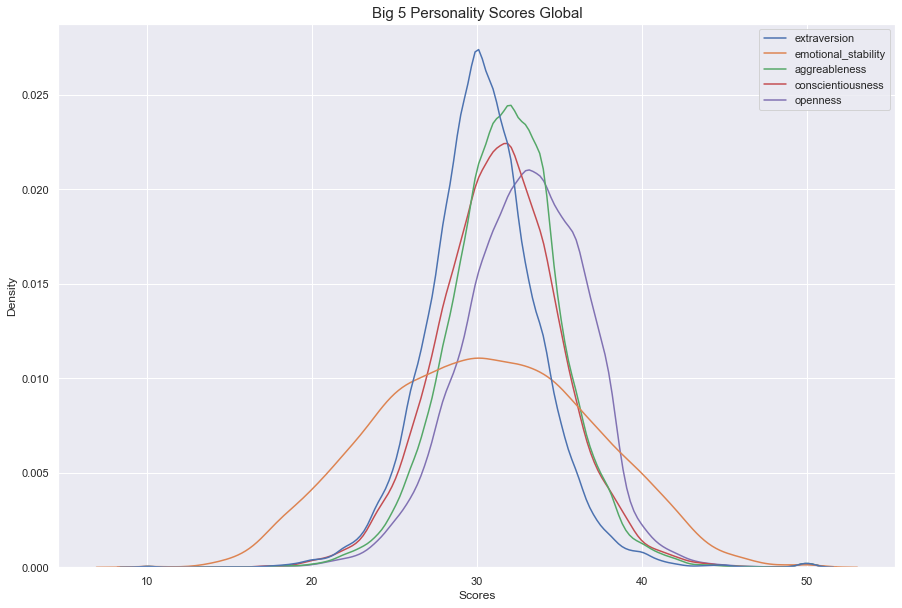

In [9]:
# visualize the distribution of every personality trait

sns.kdeplot(data= data_sum);
plt.xlabel('Scores');
plt.ylabel('Density');
#plt.legend(['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']);
plt.title('Big 5 Personality Scores Global', fontsize=15);

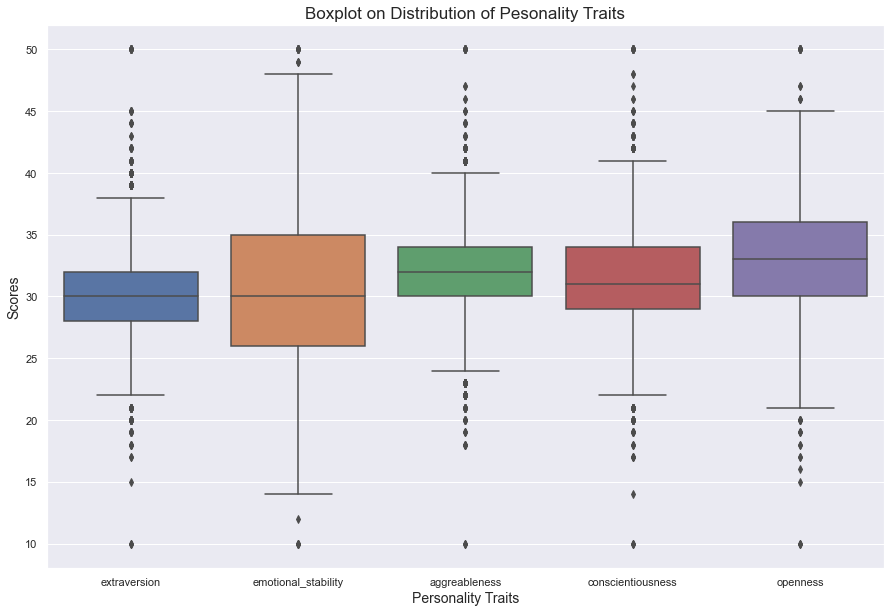

In [10]:
# use boxplot to visualize the distribution of each personality trait

sns.boxplot(data= data_sum);
plt.xlabel('Personality Traits', fontsize=14);
plt.ylabel ('Scores', fontsize=14);
plt.title('Boxplot on Distribution of Pesonality Traits', fontsize=17);

In [11]:
# explore personality data for asia

asia_list = ['IN','PH','MY','SG','CH','HK','VN','KR','LK','MM','TH','ID','KH']

asia = []
for i in asia_list:
    x =data_sum[data_sum['country']== i]
    asia.append(x)
asia = pd.concat(asia)

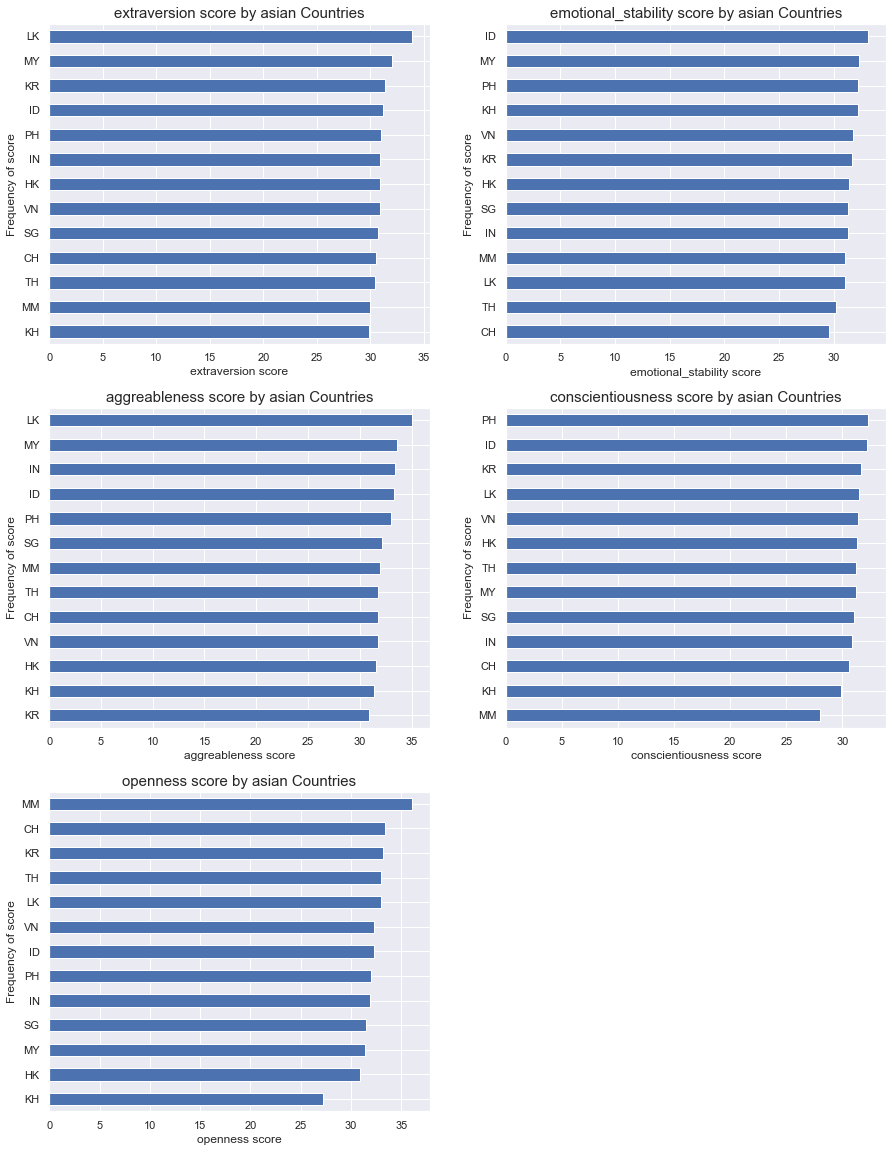

In [12]:
# visualize average personality trait score for asia

fig=plt.gcf()
fig.set_size_inches(15,20)

traits = ['extraversion','emotional_stability','aggreableness','conscientiousness','openness']
fig_number = [1,2,3,4,5]
for i,j in zip(traits, fig_number):
    
    plt.subplot(3,2,j)
    asia.groupby('country')[i].mean().sort_values().plot(kind='barh')
    plt.xlabel(f'{i} score');
    plt.ylabel('Frequency of score');
    plt.title(f'{i} score by asian Countries', fontsize=15);
    
plt.tight_layout
plt.show()

#sns.kdeplot(data=asia, x='ext_sum', hue='country', palette='bright');


In [13]:
# create a dataframe for developed countries

dev_list = ['US','GB','AU','JP','CA','DE','IT','FR']

dev = []
for i in dev_list:
    x =data_sum[data_sum['country']== i]
    dev.append(x)
dev = pd.concat(dev)

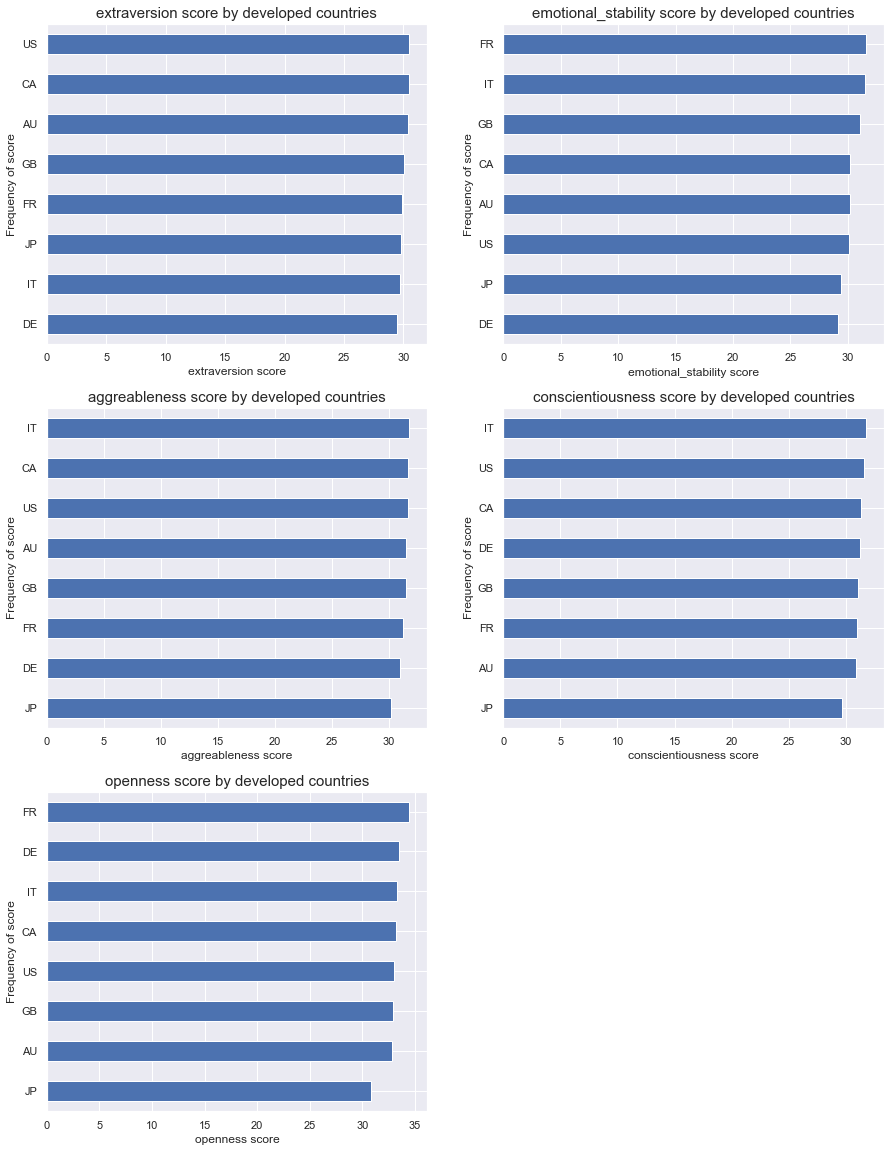

In [14]:
# visualize average personality traits scores for developed countries

fig=plt.gcf()
fig.set_size_inches(15,20)

traits = ['extraversion','emotional_stability','aggreableness','conscientiousness','openness']
fig_number = [1,2,3,4,5]
for i,j in zip(traits, fig_number):
    
    plt.subplot(3,2,j)
    dev.groupby('country')[i].mean().sort_values().plot(kind='barh')
    plt.xlabel(f'{i} score');
    plt.ylabel('Frequency of score');
    plt.title(f'{i} score by developed countries', fontsize=15);
    
plt.tight_layout
plt.show()


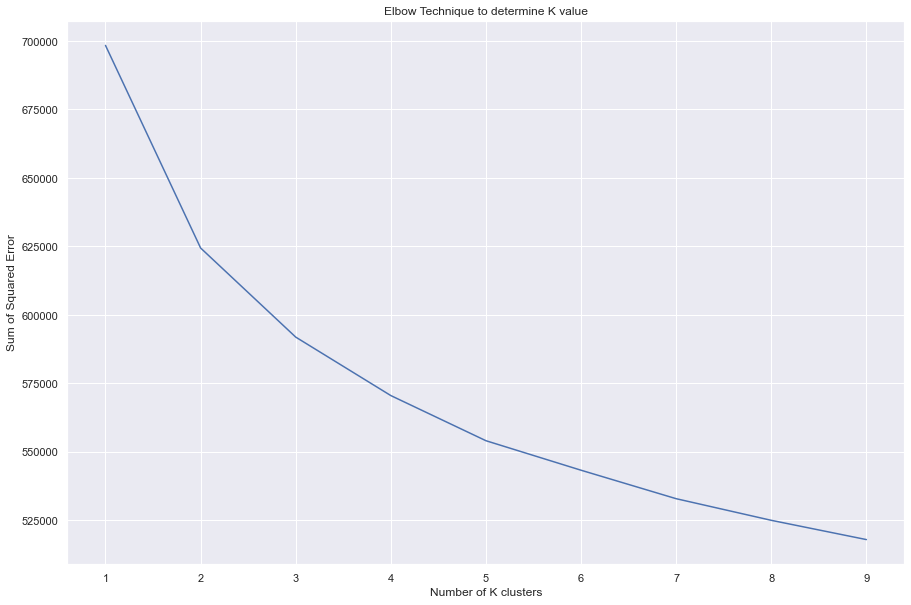

In [15]:
# compute optimum number of clusters for KMeans using Elbow Technique

x = data_sample.loc[:,'EXT1':'OPN10']
k = range(1,10)
sse=[]
for i in k:
    km = KMeans(n_clusters=i, random_state=0).fit(x)
    sse.append(km.inertia_)
    
plt.plot(k, sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum of Squared Error');
plt.title('Elbow Technique to determine K value');

In [16]:
x = data_sample_analysis.loc[:,'EXT1':'OPN10']
data_sample_analysis['clusters'] = KMeans(n_clusters=3, random_state=42).fit_predict(x)

In [17]:
data_sample_analysis

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,clusters
105220,2.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,2.0,3.0,...,4.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,US,2
489562,5.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,3.0,...,4.0,2.0,4.0,2.0,3.0,2.0,4.0,4.0,AE,1
191194,4.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,...,5.0,3.0,3.0,1.0,5.0,4.0,4.0,3.0,NO,1
272525,3.0,4.0,3.0,4.0,3.0,2.0,5.0,3.0,4.0,3.0,...,4.0,2.0,3.0,2.0,4.0,3.0,5.0,3.0,CA,2
342581,5.0,4.0,2.0,4.0,4.0,1.0,1.0,1.0,5.0,4.0,...,4.0,2.0,4.0,2.0,5.0,3.0,5.0,5.0,US,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324984,3.0,1.0,4.0,2.0,3.0,2.0,3.0,5.0,1.0,4.0,...,4.0,2.0,4.0,1.0,4.0,4.0,5.0,4.0,GB,1
93775,3.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,4.0,4.0,...,2.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,US,0
829623,4.0,3.0,3.0,4.0,2.0,2.0,3.0,5.0,3.0,4.0,...,1.0,3.0,3.0,4.0,4.0,4.0,5.0,2.0,US,0
603880,3.0,2.0,3.0,2.0,4.0,2.0,2.0,3.0,5.0,4.0,...,5.0,2.0,5.0,1.0,4.0,5.0,5.0,4.0,US,1


In [75]:
# # plot 3 pie charts for each cluster

# add_cluster_0 = []
# cluster_0_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==0]
# n=0
# j=10
# for w in range(5):
#     q=cluster_0_temp.iloc[:,n:j].mode().mode().mean().mean()
#     add_cluster_0.append(q)
#     n+=10
#     j+=10
# x = np.array([add_cluster_0]).reshape(-1,)


# add_cluster_1 = []
# cluster_1_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==1]
# n=0
# j=10
# for w in range(5):
#     a=cluster_1_temp.iloc[:,n:j].mode().mode().mean().mean()
#     #a = data_sample_analysis.iloc[1,n:j].mode().mode().mean()
#     add_cluster_1.append(a)
#     n+=10
#     j+=10
# y = np.array([add_cluster_1]).reshape(-1,)


# add_cluster_2 = []
# cluster_2_temp = data_sample_analysis.loc[data_sample_analysis['clusters']==2]
# n=0
# j=9
# for w in range(5):
#     s=cluster_1_temp.iloc[:,n:j].mode().mode().mean().mean()
#     #s = data_sample_analysis.iloc[2,n:j].mode().mode().mean()
#     add_cluster_2.append(s)
#     n+=10
#     j+=10
# z = np.array([add_cluster_2]).reshape(-1,)


# fig=plt.gcf()
# fig.set_size_inches(15,15)

# plot=1
# group = ['group 1', 'group 2', 'group 3']
# chart = [x,y,z]
# for g, c in zip(group, chart):
#     labels=['Extraversion','Emotional Stability','Agreeableness','Conscientiousness','Openness']
#     plt.subplot(2,2,plot)
#     plt.pie(c, autopct='%1.0f%%', labels=labels);
#     plt.title(f"{g}", fontsize=17)
#     plot+=1
    

In [19]:
# compute the sum of every personality trait and assign to new dataframe

data_sample_analysis['extraversion']=data_sample_analysis.loc[:,'EXT1':'EXT10'].sum(axis=1)
data_sample_analysis['emotional_stability']=data_sample_analysis.loc[:,'EST1':'EST10'].sum(axis=1)
data_sample_analysis['aggreableness']=data_sample_analysis.loc[:,'AGR1':'AGR10'].sum(axis=1)
data_sample_analysis['conscientiousness']=data_sample_analysis.loc[:,'CSN1':'CSN10'].sum(axis=1)
data_sample_analysis['openness']=data_sample_analysis.loc[:,'OPN1':'OPN10'].sum(axis=1)

data_sample_summary = data_sample_analysis.loc[:,'country':'openness']

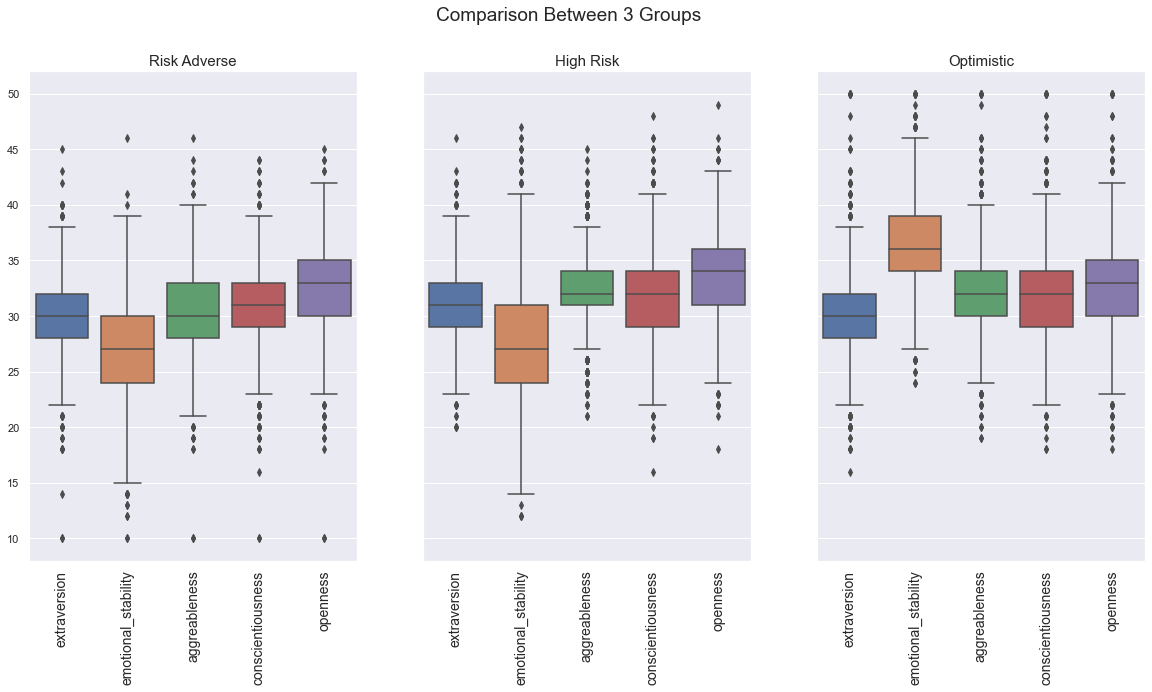

In [20]:
# plot 3 boxplots according to the 3 clusters

cluster_0 = data_sample_summary.loc[data_sample_summary['clusters']==0, 'extraversion':'openness']
cluster_1 = data_sample_summary.loc[data_sample_summary['clusters']==1, 'extraversion':'openness']
cluster_2 = data_sample_summary.loc[data_sample_summary['clusters']==2, 'extraversion':'openness']

cluster_n = [cluster_0,cluster_1,cluster_2]
group = ['Risk Adverse','High Risk', 'Optimistic']

fig, axes = plt.subplots(1,3, figsize=(20,9), sharey=True);
fig.suptitle('Comparison Between 3 Groups', fontsize=19);

h=0
for i, j in zip(cluster_n, group):
    ax = sns.boxplot(ax=axes[h], data=i)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14);
    ax.set_title(j, fontsize=15);
    h+=1


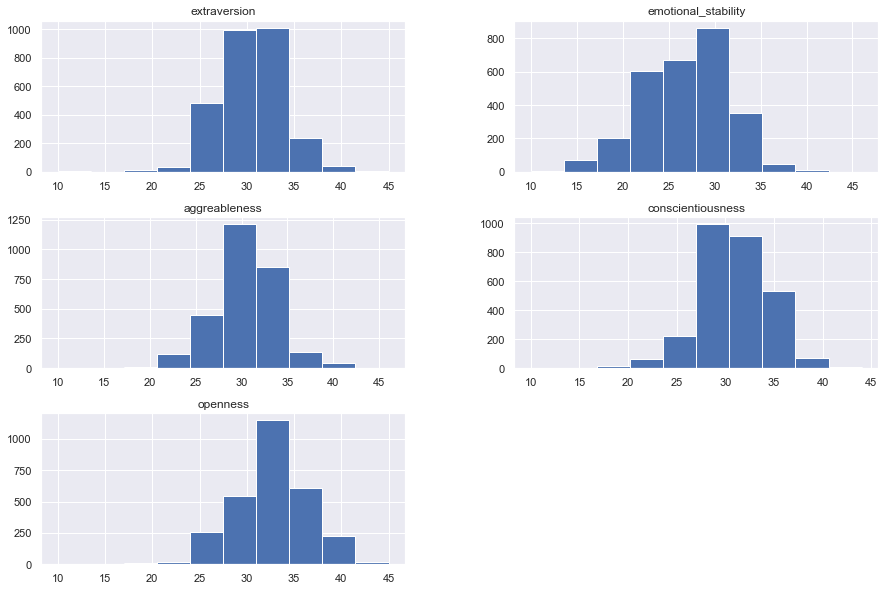

In [21]:
cluster_0.hist();  # not so extroverted, but conscientious, innovative and adaptable, relatively stable

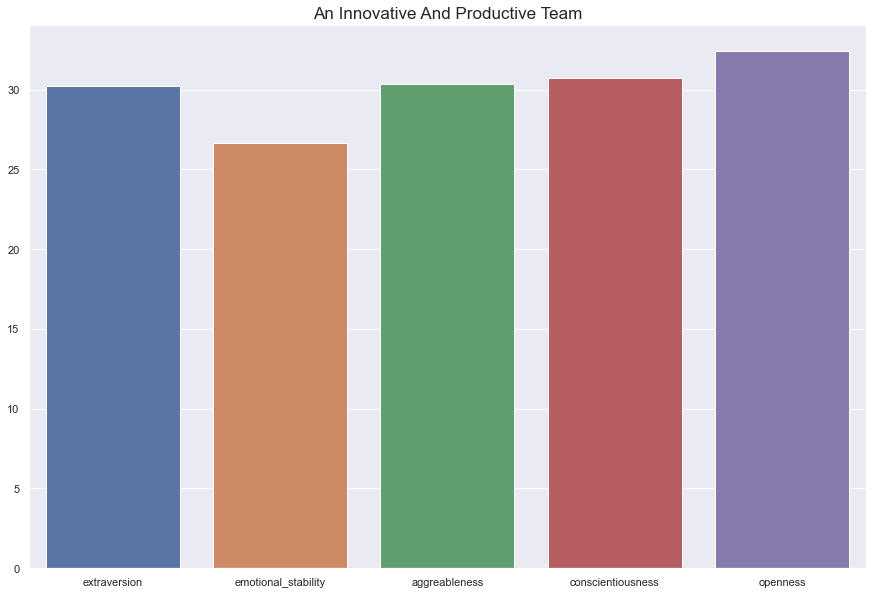

In [22]:
# comparing all the personal traits in clustor 0

sns.barplot(data=cluster_0, ci=None);
plt.title('An Innovative And Productive Team', fontsize=17);

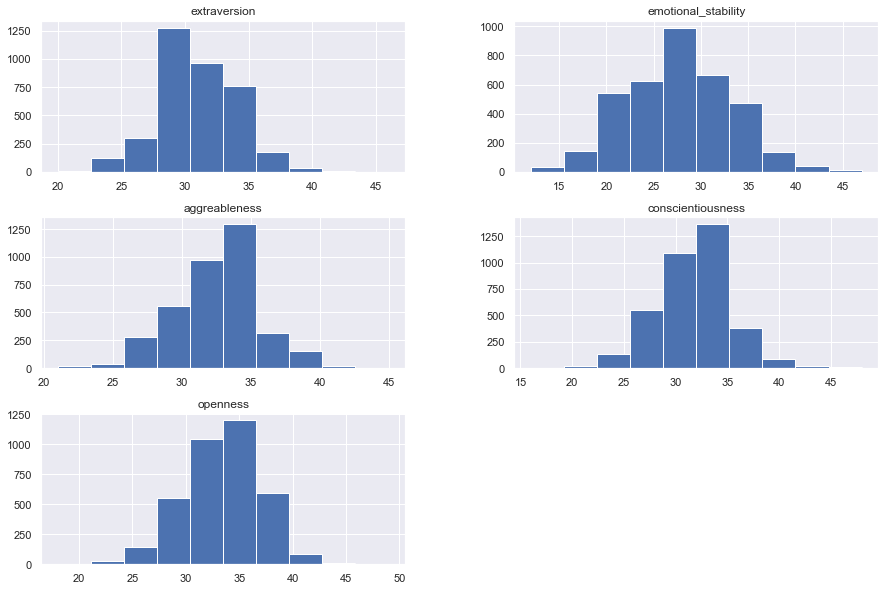

In [23]:
cluster_1.hist(); # highly extravert, highly unstable, very conscientious, very innovative

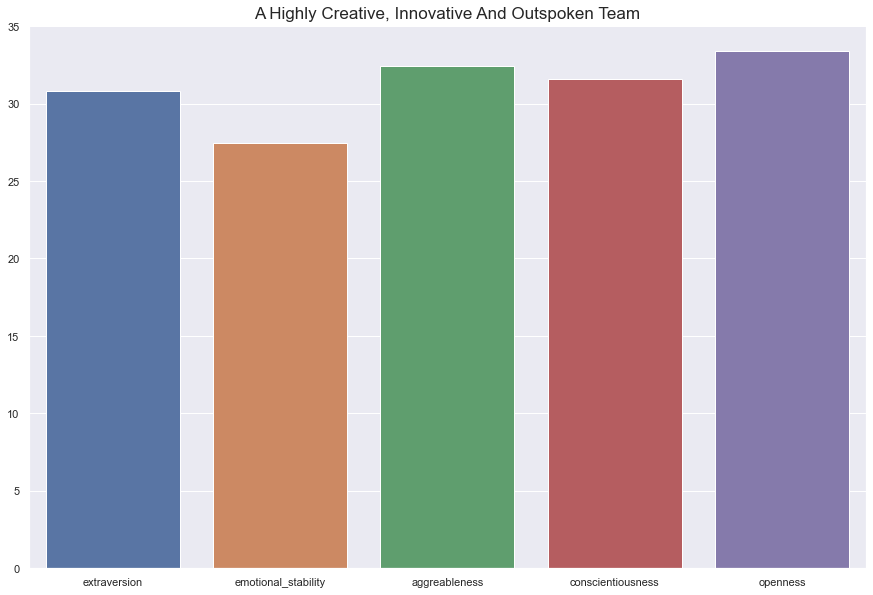

In [24]:
# comparing all the personal traits in clustor 1

sns.barplot(data=cluster_1, ci=None);
plt.title('A Highly Creative, Innovative And Outspoken Team', fontsize=17);

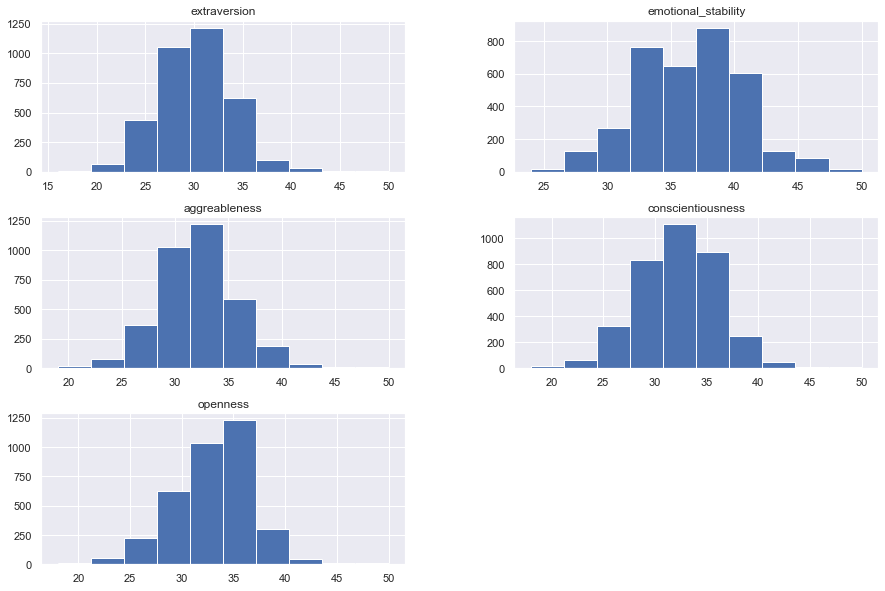

In [25]:
cluster_2.hist(); # highly unstable, less cohesive, less conscientious, not so extravert, but innovative

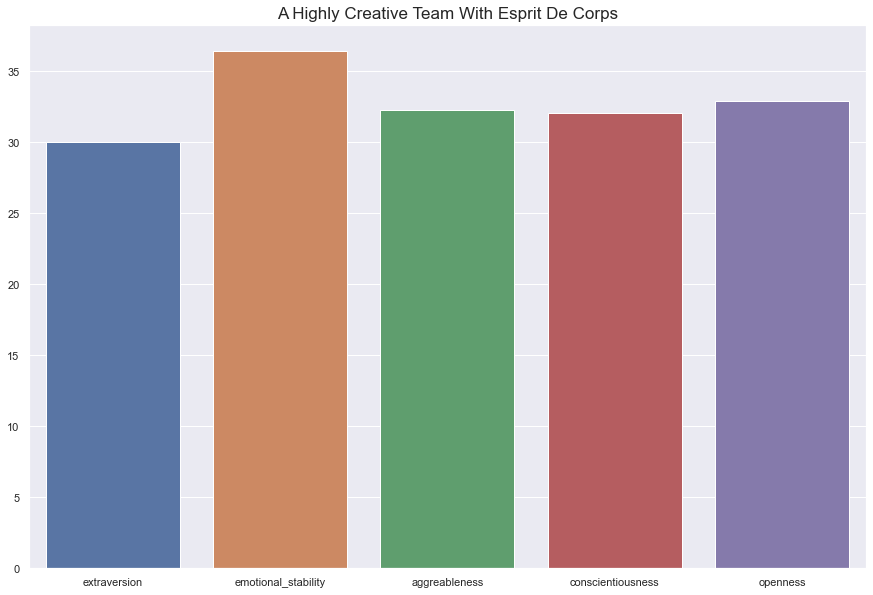

In [26]:
# comparing all the personal traits in clustor 2

sns.barplot(data=cluster_2, ci=None);
plt.title('A Highly Creative Team With Esprit De Corps', fontsize=17);

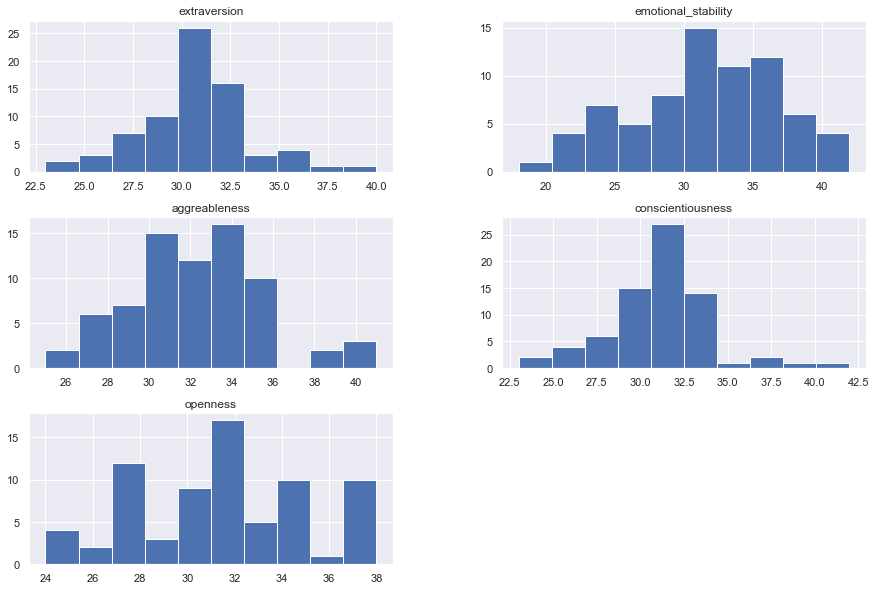

In [27]:
# personality traits for Singapore

asia.loc[asia['country']=='SG'].hist(); 

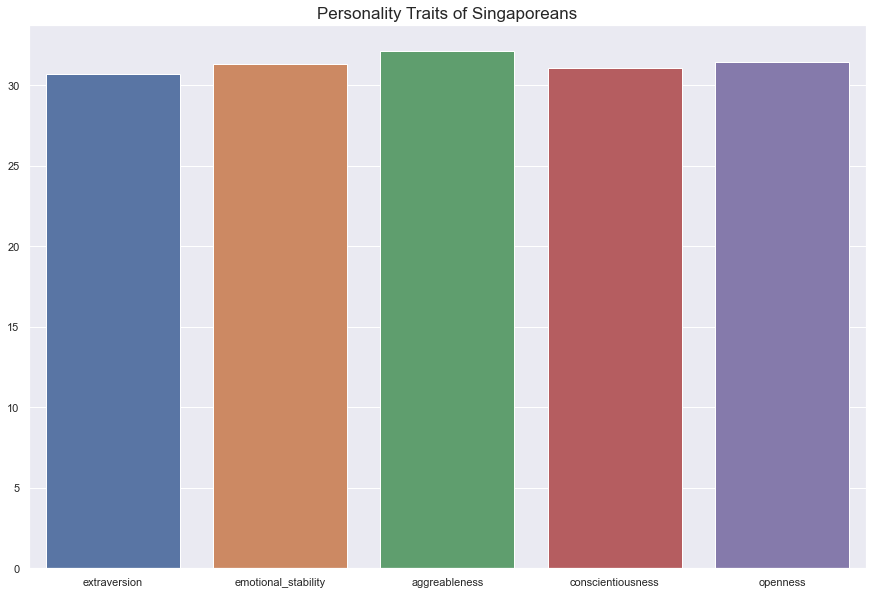

In [28]:
# a snapshot of Singaporean personality traits and comparison

sns.barplot(data=asia.loc[asia['country']=='SG'], ci=None);
plt.title('Personality Traits of Singaporeans', fontsize=17);

In [ ]:
x = data_sample.loc[:,'EXT1':'OPN10']

In [69]:
# clustering by DBSCAN, BMI vs Age

from sklearn.cluster import DBSCAN

x = data_sample.loc[:,'EXT1':'OPN10']

clf = DBSCAN(eps=5, min_samples=30)

dbscan = clf.fit_predict(x)
unique_num = set(dbscan)
acc=[]

for i in unique_num:
    acc.append(i)
    
acc

[0, 1, -1]

In [70]:
data_sample_analysis_dbscan = data_sample_analysis.copy()

In [71]:
data_sample_analysis_dbscan['clusters'] = dbscan

In [72]:
data_sample_analysis_dbscan.clusters.value_counts()

-1    9885
 1      66
 0      49
Name: clusters, dtype: int64

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(2)

In [49]:
pca_array = pca.fit_transform(x)

In [51]:
pca_df = pd.DataFrame(data=pca_array, columns=['pca_1','pca_2'])
pca_df.head()

,pca_1,pca_2
0,6.255371,0.304758
1,1.917021,-1.083233
2,1.612130,1.231715
3,0.467888,2.937710
4,0.452268,0.009406


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

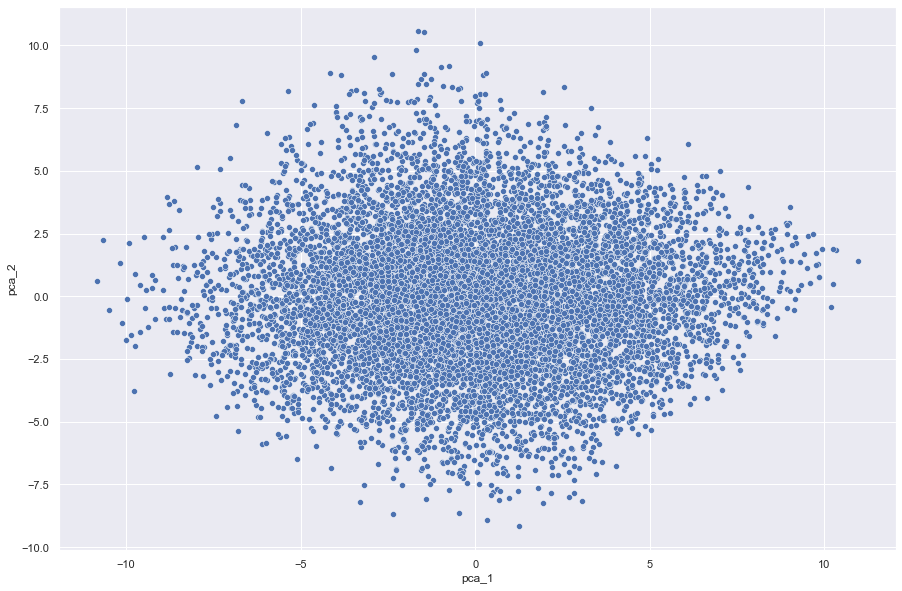

In [52]:
sns.scatterplot(data=pca_df, x='pca_1', y='pca_2')

In [74]:
# clustering by DBSCAN, BMI vs Age

from sklearn.cluster import DBSCAN



clf = DBSCAN(eps=4, min_samples=3)

dbscan = clf.fit_predict(pca_df)
unique_num = set(dbscan)
acc=[]

for i in unique_num:
    acc.append(i)
    
acc

[0]

In [55]:
dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)